<a href="https://colab.research.google.com/github/YYEg/MAD/blob/main/LAB3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

Получим исходные данные. Для примера выберем число кластеров
N = 4, число признаков D = 2, стандартное отклонение = 3

In [167]:
N = 4
D = 2
X,y=make_blobs(n_samples=100,centers=N,n_features=D,random_state=None,cluster_std=3)
df=pd.DataFrame(X)
df['Class']=y


Выводим показатели описательной статистики, а также диаграмму разброса

In [168]:
df.describe()

,0,1,Class
count,100.000000,100.000000,100.000000
mean,1.193452,0.979931,1.500000
std,6.755653,7.117271,1.123666
min,-12.973723,-16.120460,0.000000
25%,-2.907701,-4.883545,0.750000
50%,2.895485,1.087366,1.500000
75%,5.671389,7.174835,2.250000
max,12.364548,15.186023,3.000000


In [169]:
y

array([2, 1, 2, 1, 1, 3, 3, 1, 0, 3, 3, 0, 1, 0, 1, 2, 3, 0, 2, 0, 3, 2,
       0, 3, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 3, 3, 2, 3, 1, 0, 0, 2, 2,
       2, 1, 1, 3, 1, 0, 1, 1, 0, 3, 2, 1, 2, 3, 1, 0, 2, 2, 3, 3, 3, 0,
       2, 3, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 3, 0, 1, 3, 2, 3, 3, 0,
       0, 3, 2, 3, 0, 3, 3, 2, 1, 1, 0, 1])

На графике видно, что после 3 точек сумма квадратов уменьшается медленно, значит число кластеров подобрано верно

In [170]:
df['Class']=y
df

,0,1,Class
0,2.245640,-3.498489,2
1,9.162294,7.536961,1
2,1.790514,-3.071354,2
3,9.451484,5.518556,1
4,3.405087,7.120844,1
...,...,...,...
95,5.041854,-0.896352,2
96,5.266606,11.280911,1
97,6.509863,9.345499,1
98,-8.090788,7.244139,0


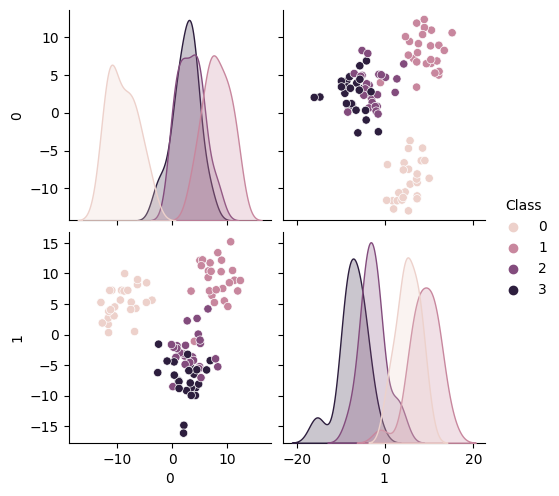

In [171]:
sns.pairplot(df,hue='Class')

Выводим стандартизированные показатели описательной статистики

In [172]:
sc = StandardScaler()
del[df['Class']]
df_t = pd.DataFrame(sc.fit_transform(df))
df_t.describe()

,0,1
count,1.000000e+02,1.000000e+02
mean,1.887379e-17,5.773160e-17
std,1.005038e+00,1.005038e+00
min,-2.107649e+00,-2.414765e+00
25%,-6.101282e-01,-8.279880e-01
50%,2.532111e-01,1.517101e-02
75%,6.661821e-01,8.747894e-01
max,1.661923e+00,2.006058e+00


In [173]:
# добавить агламератив кластеринг
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4,linkage='single').fit(df_t)
print(clustering.labels_)

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_t)
y_pred = clustering.labels_
#Создаем confusion matrix
cm = confusion_matrix(y, y_pred)
#Вывод матрицы ошибок
print("Confusion matrix:\n", cm)

[0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 2 0 2 0 0 2 1 0 0 0 0 0 0 0 2 0 2 2 0 0
 0 0 0 2 2 0 0 0 0 0 1 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 2 2
 2 0 2 0 0 2 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0]
Confusion matrix:
 [[ 0  0 24  1]
 [25  0  0  0]
 [25  0  0  0]
 [23  2  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Оценим качество класстеризации

на графике видно, что после 3 точек сумма квадратов уменьшается очень медленно, значит число кластеров подобрано верно

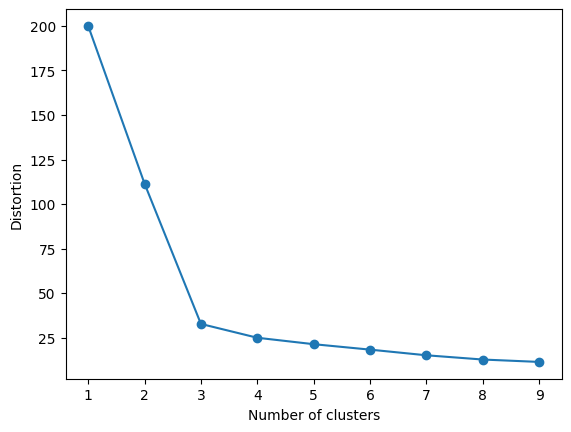

Сумма квадратов расстояний до центров кластеров: 24.92


In [174]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    km.fit(df_t)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#Другой метод
kmeans = KMeans(n_clusters=N, n_init=10)
kmeans.fit(df_t)
clusters_inertia = kmeans.inertia_
#Чем меньше значение clusters_inertia, тем лучше кластеризация

print(f'Сумма квадратов расстояний до центров кластеров: {clusters_inertia:.2f}')

Выполним иерархическую класстеризцию

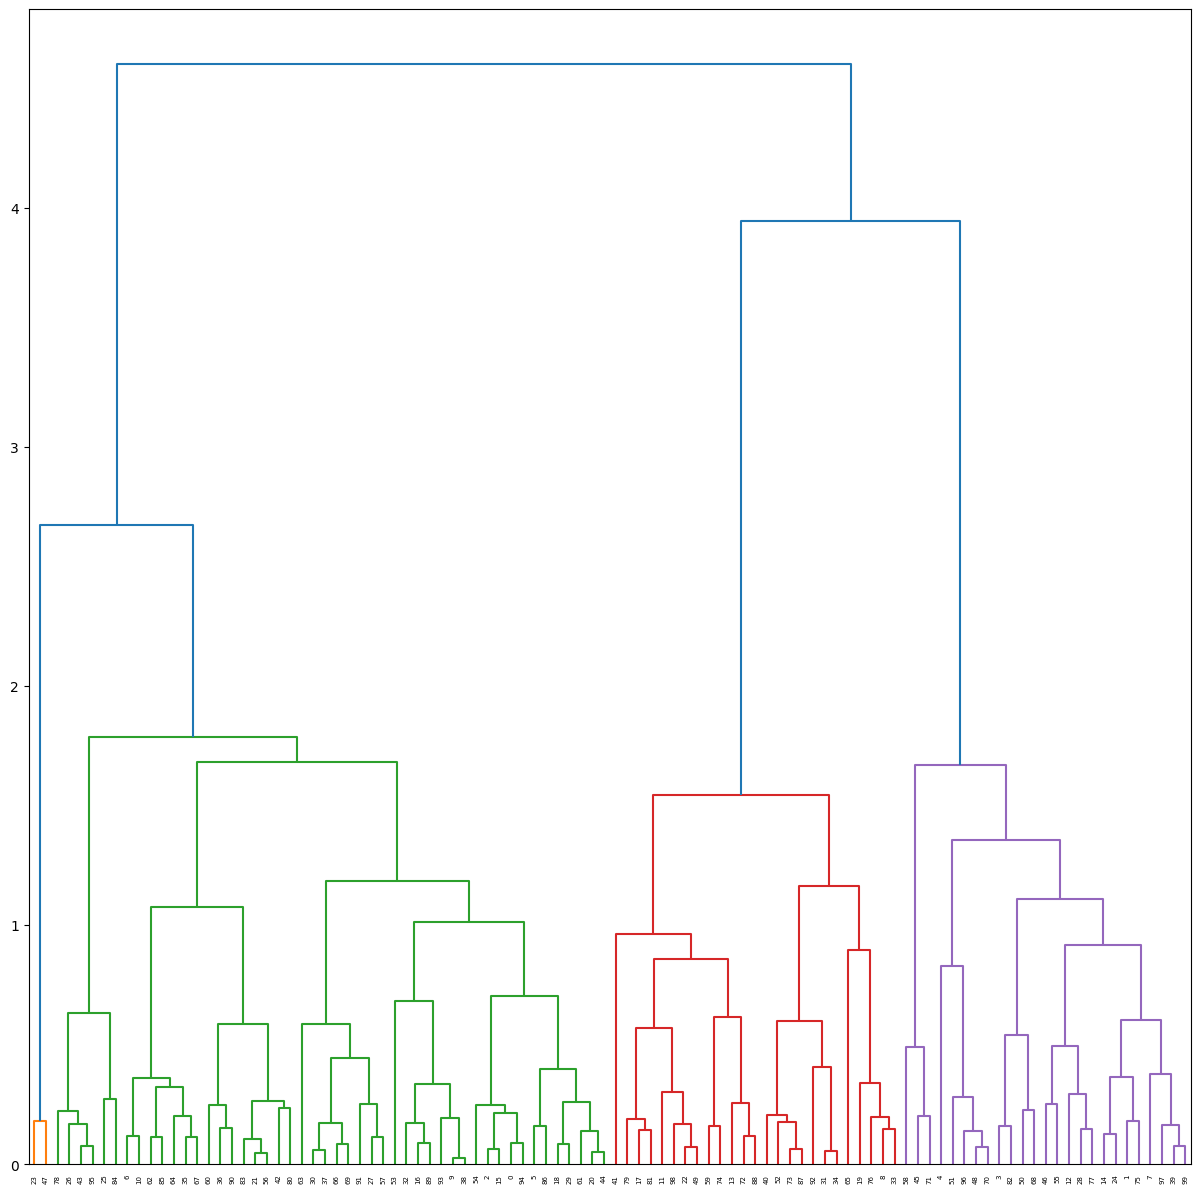

In [175]:
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(15,15))
dendrogram(mergings, color_threshold=2)
plt.show()

Агломератив класстеринг и матрицы ошибок

метод single

In [176]:
# добавить агламератив кластеринг
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4,linkage='single').fit(df_t)
print(clustering.labels_)

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_t)
y_pred = clustering.labels_
#Создаем confusion matrix
cm = confusion_matrix(y, y_pred)
#Вывод матрицы ошибок
print("Confusion matrix:\n", cm)

[0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 0 0 2 0 2 0 0 2 1 0 0 0 0 0 0 0 2 0 2 2 0 0
 0 0 0 2 2 0 0 0 0 0 1 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0 0 0 0 2 2
 2 0 2 0 0 2 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 2 0]
Confusion matrix:
 [[ 0  0 24  1]
 [25  0  0  0]
 [25  0  0  0]
 [23  2  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Метод complete

In [177]:
# добавить агламератив кластеринг
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4,linkage='complete').fit(df_t)
print(clustering.labels_)

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_t)
y_pred = clustering.labels_
#Создаем confusion matrix
cm = confusion_matrix(y, y_pred)
#Вывод матрицы ошибок
print("Confusion matrix:\n", cm)

[0 1 0 1 1 0 0 1 2 0 0 2 1 2 1 0 0 2 0 2 0 0 2 3 1 0 0 0 1 0 0 2 0 2 2 0 0
 0 0 1 2 2 0 0 0 1 1 3 1 2 1 1 2 0 0 1 0 0 1 2 0 0 0 0 0 2 0 0 1 0 1 1 2 2
 2 1 2 1 0 2 0 2 1 0 0 0 0 2 2 0 0 0 2 0 0 0 1 1 2 1]
Confusion matrix:
 [[ 0  0 25  0]
 [ 1 24  0  0]
 [24  1  0  0]
 [23  0  0  2]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Метод average

In [178]:
# добавить агламератив кластеринг
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4,linkage='average').fit(df_t)
print(clustering.labels_)

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_t)
y_pred = clustering.labels_
#Создаем confusion matrix
cm = confusion_matrix(y, y_pred)
#Вывод матрицы ошибок
print("Confusion matrix:\n", cm)

[0 2 0 2 2 0 0 2 1 0 0 1 2 1 2 0 0 1 0 1 0 0 1 3 2 0 0 0 2 0 0 1 0 1 1 0 0
 0 0 2 1 1 0 0 0 2 2 3 2 1 2 2 1 0 0 2 0 0 2 1 0 0 0 0 0 1 0 0 2 0 2 2 1 1
 1 2 1 2 0 1 0 1 2 0 0 0 0 1 1 0 0 0 1 0 0 0 2 2 1 2]
Confusion matrix:
 [[ 0 25  0  0]
 [ 1  0 24  0]
 [24  0  1  0]
 [23  0  0  2]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Метод ward

In [179]:
# добавить агламератив кластеринг
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(df_t)
print(clustering.labels_)

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_t)
y_pred = clustering.labels_
#Создаем confusion matrix
cm = confusion_matrix(y, y_pred)
#Вывод матрицы ошибок
print("Confusion matrix:\n", cm)

[1 2 1 2 1 0 0 2 3 0 0 3 2 3 2 1 0 3 0 3 0 0 3 0 2 1 1 1 2 0 1 3 0 3 3 0 0
 1 0 2 3 3 0 1 0 2 2 0 2 3 2 2 3 1 1 2 0 1 2 3 0 0 0 1 0 3 1 0 2 1 2 2 3 3
 3 2 3 2 1 3 0 3 2 0 1 0 0 3 3 0 0 1 3 0 1 1 2 2 3 2]
Confusion matrix:
 [[ 0  0  0 25]
 [ 0  2 23  0]
 [10 14  1  0]
 [20  5  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


При использовании всех методов в каждой строчке матрицы ошибок была только одна цифра, остальные нули, это значит, что ошибок нет

Выполним кластеризацию методом к-средних

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   0  1
0  2  2
[1]
[[ 0.16474113 -1.39884724]
 [ 1.03882438  1.14701782]
 [-1.51741669  0.59510508]
 [ 0.28123335 -0.57418194]]


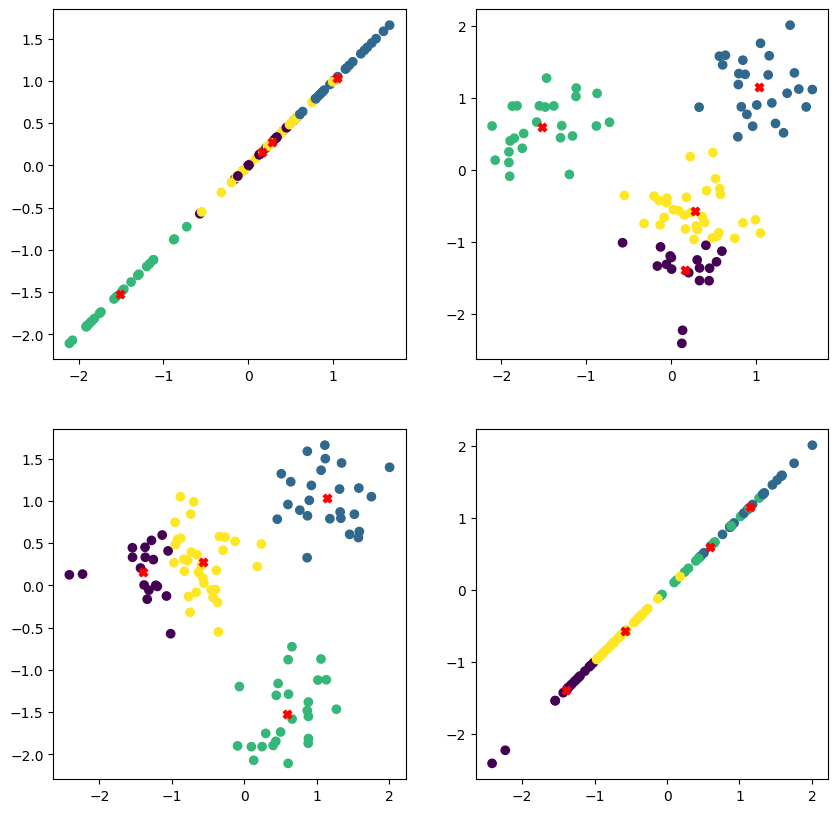

In [180]:
model = KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
y=model.predict(df_t)
artest = np.array([[2,2]]) #массив для проверки на качество разбития на класстеры
testdf = pd.DataFrame(artest) #датафрейм для проверки на качество разбития на класстеры
print(testdf)
y1=model.predict(testdf)
print(y1)
print(model.cluster_centers_)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j],marker='X', c='red')

Создадим функцию, реализующую инструмент для графического отображения результатов дискриминантного анализа, – решающих поверхностей и отображения данных:



In [181]:
def lda_qda(field1, field2, type_model,k): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    x=df_t[[field1, field2]].values #определим данные
    df_t['Class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный
    model=type_model
    #построим модель
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t[field1].min()-1, df_t[field1].max()+1
    min2, max2 = df_t[field2].min()-1, df_t[field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t[field1],df_t[field2],c=y)
    #оценка точности модели
    plt.title(model.score(x,y))
    return splot

Проведем линейный дискриминантный анализ данных. Для каждой пары признаков выведем на экран решающие поверхности и данные, для каждой пары признаков оценим точность модели дискриминантного анализа:

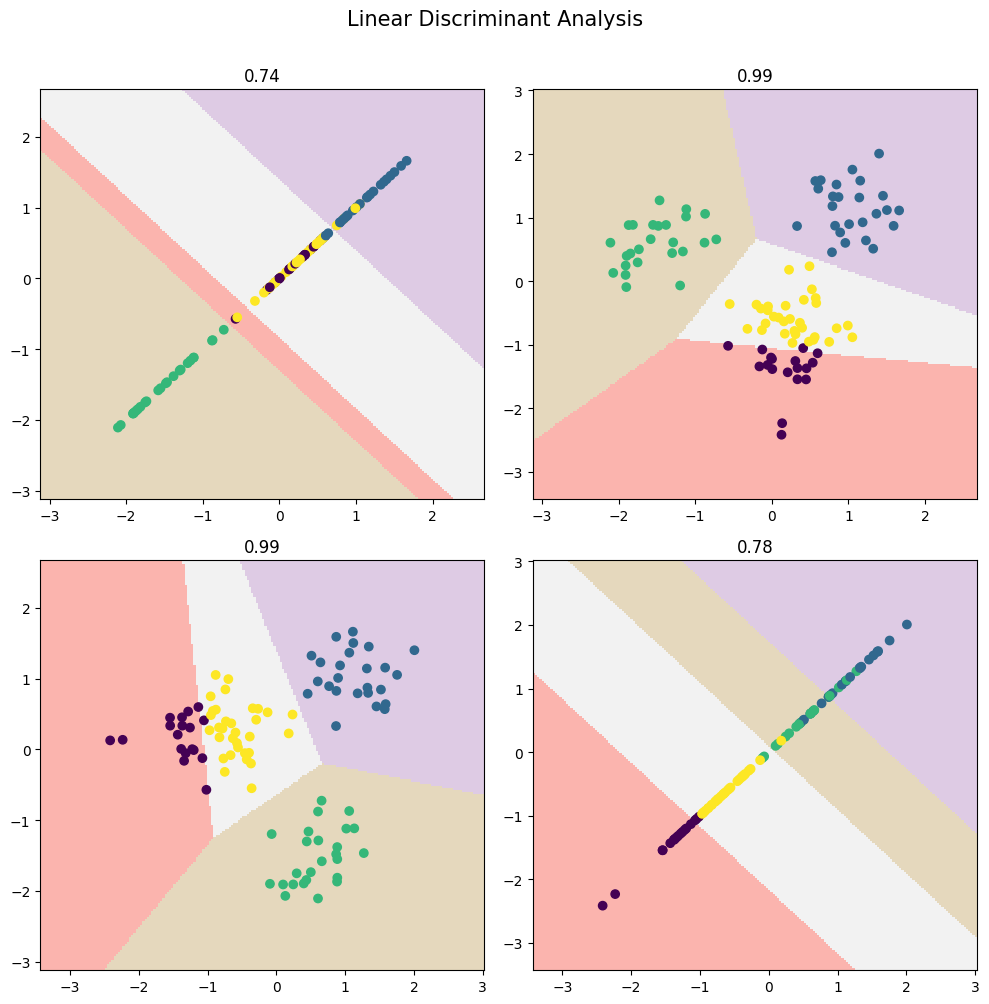

In [182]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis',y=1, fontsize=15)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,lda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Выполним предыдущий пункт, используя модель квадратичного дискриминантного анализа:



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


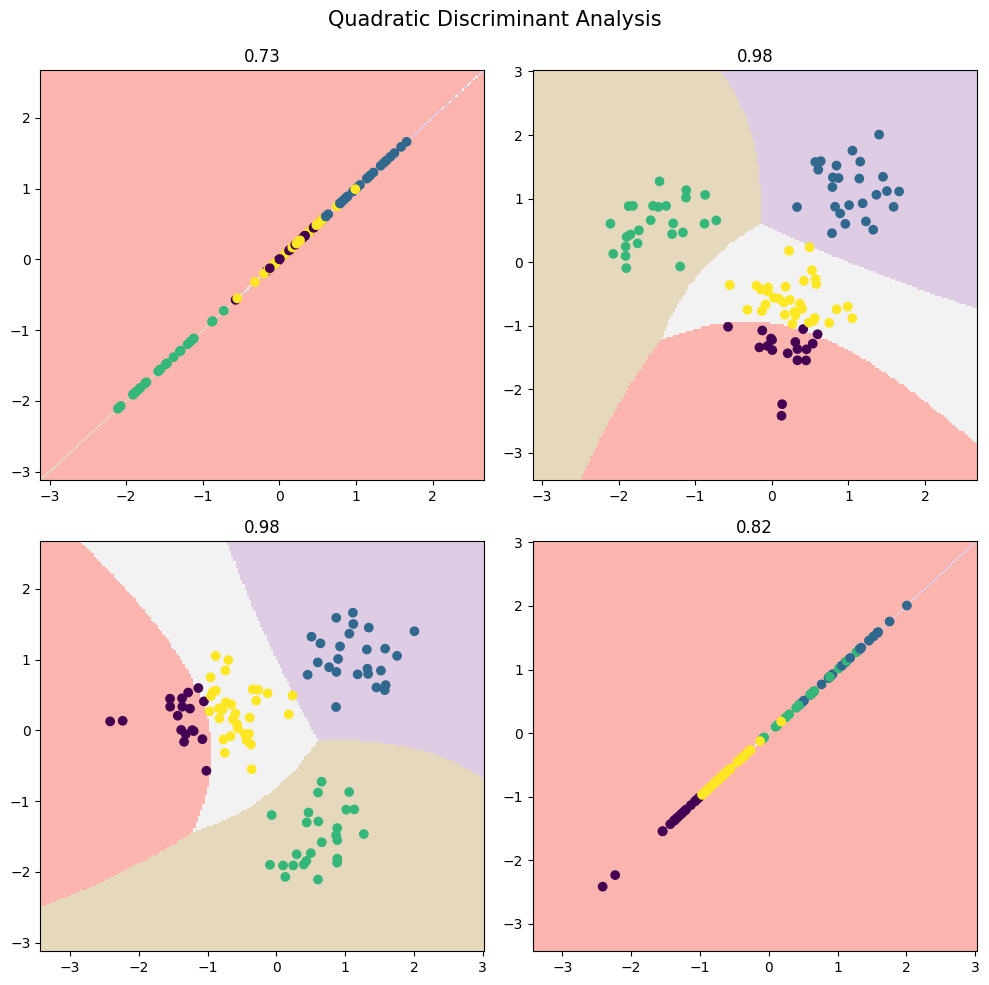

In [183]:
plt.figure(figsize=(10, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis',y=0.98, fontsize=15)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        splot=lda_qda(i, j,qda(),k)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


линейные графики, показывающие изменение значения каждого признака точек в зависимости от значения другого признака. Каждый график отображает изменение значения одного признака в зависимости от другого признака, а цвет линии соответствует конкретному признаку.

<class 'list'>


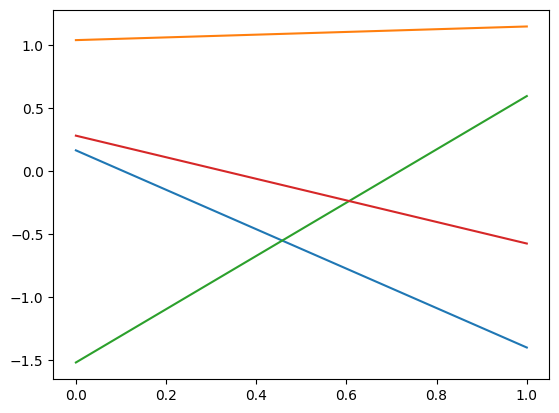

In [184]:
import matplotlib.pyplot as plt
c=model.cluster_centers_
print(list)
for i in range(N):
    plt.plot(df.columns,c[i],'-')

plt.show()